<a href="https://colab.research.google.com/github/devesh8423/Complete_DeepLearning/blob/main/Dropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


#**Generate Data**

In [123]:
np.random.seed(42)  # For reproducible results

a = 0.8   # slope
b = -0.1  # intercept
σ = 0.3   # noise level

In [124]:
x_train = np.random.uniform(-1, 1, 20)
y_train = a * x_train + b + np.random.normal(0, σ, 20)

In [125]:
x_test = np.random.uniform(-1, 1, 20)
y_test = a * x_test + b + np.random.normal(0, σ, 20)

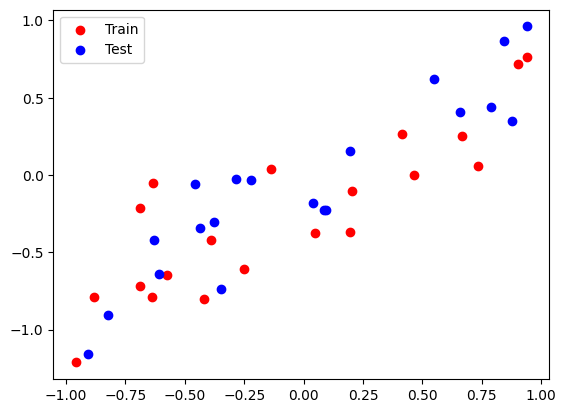

In [126]:
plt.scatter(x_train,y_train,c="red",label="Train")
plt.scatter(x_test,y_test,c="blue",label="Test")
plt.legend();

#**Regressionm Model**

In [127]:
from tensorflow.keras.metrics import R2Score
# metrics=[R2Score(name='r2_score')]



In [128]:
model_1=Sequential()
model_1.add(Dense(128,input_dim=1,activation="relu"))
model_1.add(Dense(128,activation="relu"))
model_1.add(Dense(1,activation="linear"))
adam=Adam(learning_rate=0.001)
model_1.compile(loss="mse",optimizer=adam,metrics=[R2Score(name='r2_score')])
history=model_1.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=True)

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3609 - r2_score: -0.4009 - val_loss: 0.2968 - val_r2_score: 0.0269
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3233 - r2_score: -0.2551 - val_loss: 0.2630 - val_r2_score: 0.1376
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2904 - r2_score: -0.1273 - val_loss: 0.2342 - val_r2_score: 0.2321
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.2623 - r2_score: -0.0185 - val_loss: 0.2084 - val_r2_score: 0.3169
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.2371 - r2_score: 0.0795 - val_loss: 0.1850 - val_r2_score: 0.3936
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2144 - r2_score: 0.1676 - val_loss: 0.1646 - val_r2_score: 0.4604
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1943 - r2_score: 0.2456 - val_loss: 0.1468 - val_r2_score: 0.5186
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1765 - r2_score: 0.3148 - val_loss: 0.1317 - val_r2_score: 0.5684

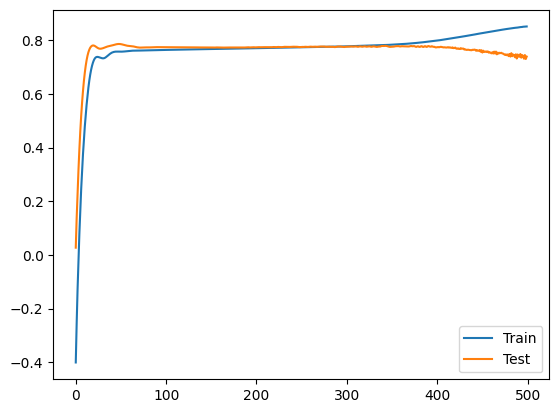

In [129]:
plt.plot(history.history["r2_score"],label="Train")
plt.plot(history.history["val_r2_score"],label="Test")
plt.legend();

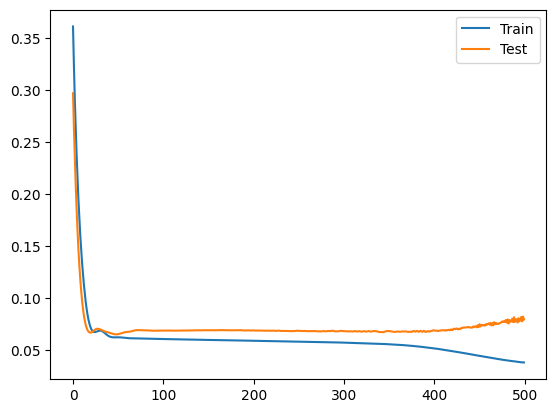

In [130]:
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.legend();

In [131]:
model_1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,693 (198.02 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,796 (132.02 KB)

In [132]:
y_pred_train=model_1.predict(x_train)
y_pred_test=model_1.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [133]:
from sklearn.metrics import r2_score

In [134]:
r2_score(y_train,y_pred_train)

0.8517722828186427

In [135]:
r2_score(y_test,y_pred_test)

0.7388758209860906

In [136]:
y_pred1=model_1.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


#**Overfitting**

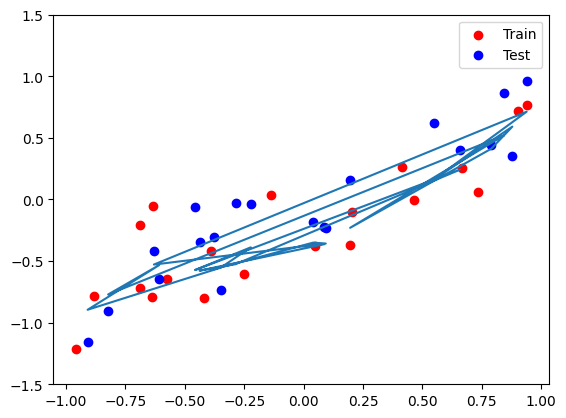

In [137]:
plt.figure()
plt.scatter(x_train,y_train,c="red",label="Train")
plt.scatter(x_test,y_test,c="blue",label="Test")
plt.plot(x_test,y_pred1)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

In [138]:
np.argsort(x_test)


array([12, 10,  3, 11, 15, 18,  0, 13, 17, 14,  1, 19,  2,  8,  5, 16,  7,
        9,  6,  4])

In [152]:
#Here We Impliment Dropuouts
model_2=Sequential()
model_2.add(Dense(128,input_dim=1,activation="relu"))
model_2.add(Dense(128,activation="relu"))
model_2.add(Dropout(0.5))

model_2.add(Dense(128,activation="relu"))
model_2.add(Dropout(0.5))

model_2.add(Dense(1,activation="linear"))
adam=Adam(learning_rate=0.01)

model_2.compile(loss="mse",optimizer=adam,metrics=[R2Score(name='r2_score')])
history=model_2.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=False)

In [153]:
y_pred2=model_2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


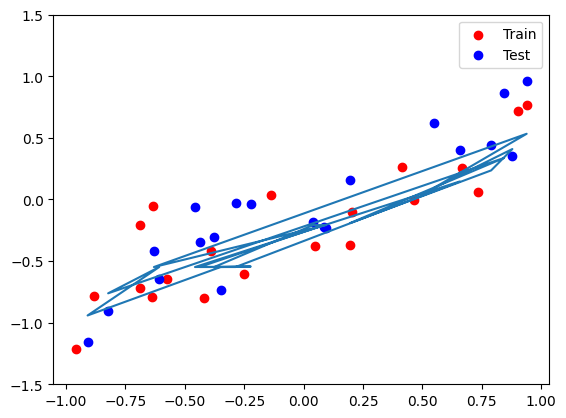

In [154]:
plt.figure()
plt.scatter(x_train,y_train,c="red",label="Train")
plt.scatter(x_test,y_test,c="blue",label="Test")
plt.plot(x_test,y_pred2)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

In [158]:
y_pred_train=model_2.predict(x_train)
y_pred_test=model_2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [159]:
r2_score(y_train,y_pred_train)

0.823332358033223

In [160]:
r2_score(y_test,y_pred_test)

0.6765683262684655